In [21]:
#The Titanic Disaster

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [ ]:
#Load the dataset

In [13]:
tdf = pd.read_csv("/Users/aashikaperunkolam/Documents/Fall 2022/AML/HW 1/titanic/train.csv")
tdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#Check for null values in each column 

In [19]:
tdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Analyze Features using a Heatmap

[[0.20438799076212472, 0.18244803695150116, 0.0],
 [0.18244803695150116, 0.7933025404157044, 0.0],
 [0.0, 0.0, 0.0023094688221709007]]

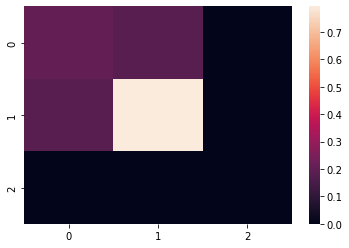

In [20]:
clusna = []
tot_na = tdf.isna().sum().sum()
for c1 in ['Age', 'Cabin', 'Embarked']:
  temp = []
  for c2 in ['Age', 'Cabin', 'Embarked']:
    if c1 == c2:
      temp = temp + [tdf[c1].isna().sum()/tot_na]
    else:
      temp = temp + [(tdf[c2].isna() & tdf[c1].isna()).sum()/tot_na]
  clusna = clusna + [temp]

sns.heatmap(clusna)
clusna

In [ ]:
#Fit the Logistic Regression Model

In [17]:
X_train, X_test, y_train, y_test = train_test_split(tdf[['Age', 'Sex', 'Pclass', 'SibSp', 'Parch']], tdf['Survived'], test_size=0.33)
preprocessor = make_column_transformer((OrdinalEncoder(categories=[['male', 'female']]), ['Sex']), remainder='passthrough')

log1 = make_pipeline(preprocessor, SimpleImputer(strategy='constant', fill_value=0), LogisticRegression(penalty='l2'))
log1.fit(X_train, y_train)
print(accuracy_score(log1.predict(X_train), y_train))
print(precision_recall_fscore_support(log1.predict(X_train), y_train))
print(accuracy_score(log1.predict(X_test), y_test))
print(precision_recall_fscore_support(log1.predict(X_test), y_test))

0.802013422818792
(array([0.86426593, 0.70638298]), array([0.81889764, 0.77209302]), array([0.84097035, 0.73777778]), array([381, 215]))
0.752542372881356
(array([0.81914894, 0.63551402]), array([0.79792746, 0.66666667]), array([0.80839895, 0.6507177 ]), array([193, 102]))


In [ ]:
#Calculate the Odds Ratio

In [7]:
oddsratio = pd.DataFrame(log1['logisticregression'].coef_.T, X_train.columns, columns=['Coefficients'])
oddsratio

,Coefficients
Age,2.691724
Sex,-0.017016
Pclass,-1.004295
SibSp,-0.252240
Parch,-0.135205


In [8]:
np.exp(oddsratio)/(1+np.exp(oddsratio))

,Coefficients
Age,0.936537
Sex,0.495746
Pclass,0.268098
SibSp,0.437272
Parch,0.466250


In [ ]:
#Making Predictions on Test Data

In [18]:
x_select = ['Age', 'Sex', 'Pclass', 'SibSp', 'Parch']
y = df['Survived']
X_whole = tdf[x_select]

X_test = pd.read_csv("/Users/aashikaperunkolam/Documents/Fall 2022/AML/HW 1/titanic/test.csv")
x_test = X_test[x_select]
preprocessor = make_column_transformer((OrdinalEncoder(categories=[['male', 'female']]), ['Sex']), remainder='passthrough')

log1 = make_pipeline(preprocessor, SimpleImputer(strategy='constant', fill_value=0), LogisticRegression(penalty='l2'))
log1.fit(X_whole, y)

y_test_pred = log1.predict(x_test)


submission = pd.DataFrame({"PassengerId": pd.read_csv("/Users/aashikaperunkolam/Documents/Fall 2022/AML/HW 1/titanic/test.csv").PassengerId, "Survived": y_test_pred})

submission.to_csv("submission.csv", index=False)